# Test ELFI custom priors

In [3]:
import numpy as np
import scipy.stats as sps
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
import elfi

# Uniform disk

In [5]:
r_bound = 47.9

class CustomPrior_disk_x(elfi.Distribution):
    def rvs(r = r_bound, size=1, random_state=None):
        r2 = sps.uniform.rvs(loc=0, scale=r**2, size=size, random_state=random_state)
        theta = sps.uniform.rvs(loc=0, scale=2*np.pi, size=size, random_state=random_state)
        return r2**0.5 * np.cos(theta)
    
    def pdf(x, loc=0, scale=1):
        return np.ones(len(x)) / (np.pi * r_bound ** 2)
    
class CustomPrior_disk_y(elfi.Distribution):
    def rvs(x, r = r_bound, size=1, random_state=None):
        max_y2 = r**2 - x**2
        return sps.uniform.rvs(loc=-max_y2**0.5, scale=2*max_y2**0.5, size=size, random_state=random_state)

    def pdf(y, loc=0, scale=1):
        return np.ones(len(y)) / (np.pi * r_bound ** 2)

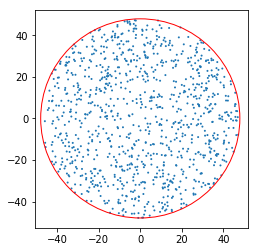

In [6]:
x = CustomPrior_disk_x.rvs(size = 1000)
y = CustomPrior_disk_y.rvs(x, size = 1000)

plt.scatter(x, y, s=4, edgecolor='none')
#plt.hist2d(x, y, bins=100)
#plt.colorbar()
plt.gca().add_artist(plt.Circle((0,0), r_bound, color='red', fill=False))
plt.gca().set_aspect(1)

In [7]:
px = elfi.Prior(CustomPrior_disk_x)
py = elfi.Prior(CustomPrior_disk_y, px)

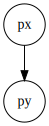

In [8]:
elfi.draw(px)